In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

In [15]:
training_data = np.load('/content/drive/My Drive/training_dataset/training_data.npy')
print(training_data.shape)

categories = np.load('/content/drive/My Drive/training_dataset/categories.npy')
print(categories.shape)

valid_periods = np.load('/content/drive/My Drive/training_dataset/valid_periods.npy')
print(valid_periods.shape)

(48000, 2776)
(48000,)
(48000, 2)


(48000, 2)

Find out the shortest and longest interval in the time series.

In [16]:
min, max = (9999, -1), (0, -1)
for i, tuple in enumerate(valid_periods):
    diff = tuple[1] - tuple[0]
    if diff < min[0]: min = (diff, i)
    if diff > max[0]: max = (diff, i)

min, max

((24, 47852), (2776, 17143))

In [12]:
index_shortest = min[1]
index_longest = max[1]

(48000, 2776)

In [17]:
def extract_valid_data(training_data, filter=600):
    valid_data = []
    valid_categories = []
    valid_valid_periods = []
    for i in range(len(training_data)):
        start, end = valid_periods[i]
        if (end-start)<= filter:
            valid_data.append(training_data[i])
            valid_categories.append(categories[i])
            valid_valid_periods.append(valid_periods[i])
    return np.array(valid_data), np.array(valid_categories), np.array(valid_valid_periods)

In [14]:
#training_data,categories,valid_periods  = extract_valid_data(training_data)

In [18]:
training_data_df = pd.DataFrame(training_data)
training_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Columns: 2776 entries, 0 to 2775
dtypes: float64(2776)
memory usage: 1016.6 MB


In [19]:
training_data_df = training_data_df.astype(np.float32)
training_data_df.info()
training_data_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Columns: 2776 entries, 0 to 2775
dtypes: float32(2776)
memory usage: 508.3 MB


,0,1,2,3,4,5,6,7,8,9,...,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,0.515814,0.520281,0.528503,0.533299,0.530825,0.525855,0.522132,0.523433,0.530226,0.531927
std,0.000837,0.000813,0.000781,0.000760,0.000757,0.000749,0.000745,0.000741,0.000741,0.000733,...,0.288777,0.289387,0.287716,0.288655,0.289785,0.291925,0.296271,0.302170,0.303567,0.304784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.260870,0.265976,0.275296,0.276525,0.269440,0.259259,0.246887,0.242881,0.246772,0.244700
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.529901,0.535940,0.546886,0.556100,0.552312,0.544393,0.542242,0.550017,0.561833,0.564695
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.774056,0.781060,0.788449,0.795617,0.794872,0.793385,0.794734,0.802337,0.809368,0.815334
max,0.183319,0.178061,0.171051,0.166542,0.165793,0.164041,0.163324,0.162288,0.162288,0.160536,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
sample_first = training_data_df.T[0]
sample_shortest = training_data_df.T[index_shortest]
sample_longest = training_data_df.T[index_longest]

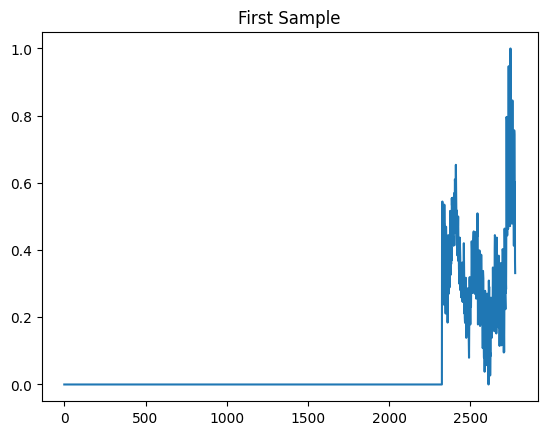

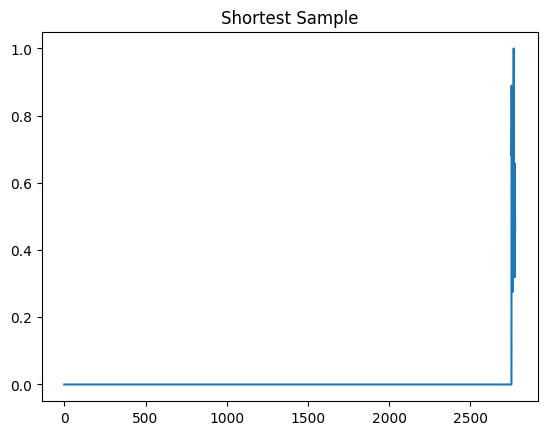

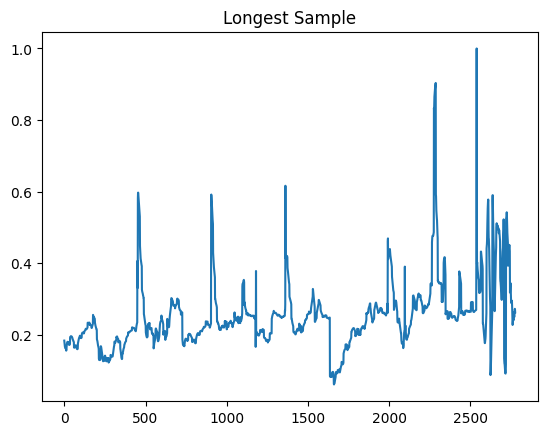

In [21]:
import matplotlib.pyplot as plt

plt.plot(sample_first)
plt.title('First Sample')
plt.show()

plt.plot(sample_shortest)
plt.title('Shortest Sample')
plt.show()

plt.plot(sample_longest)
plt.title('Longest Sample')
plt.show()

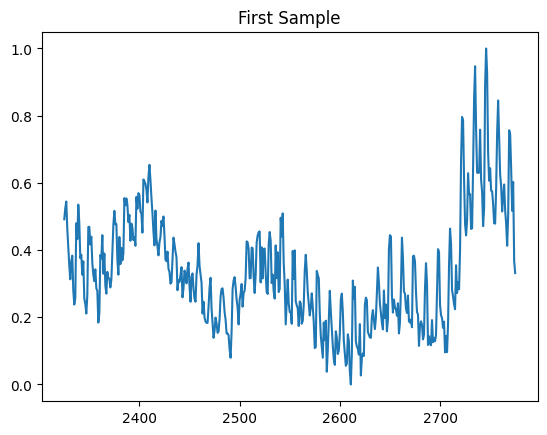

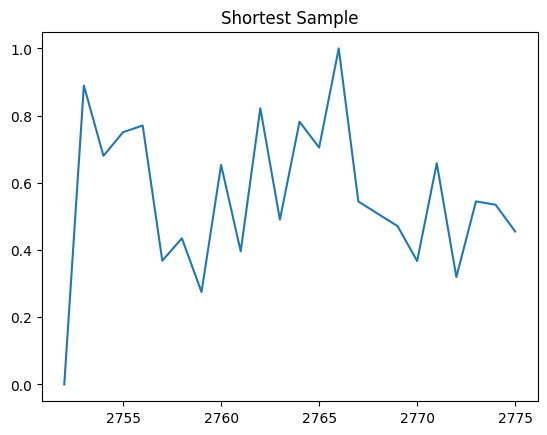

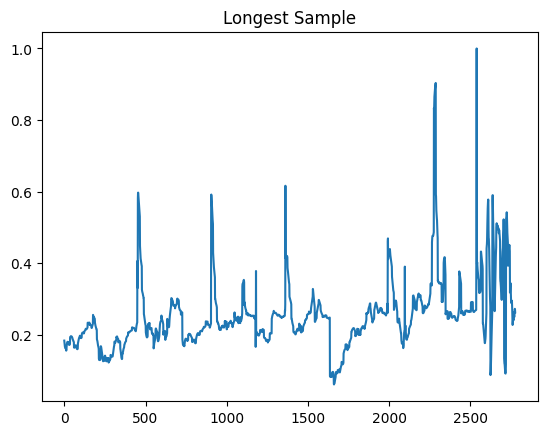

In [22]:
start_first, end_first = valid_periods[0]
sample_first_trimmed = sample_first[start_first:end_first]

plt.plot(sample_first_trimmed)
plt.title('First Sample')
plt.show()



start_shortest, end_shortest = valid_periods[index_shortest]
sample_shortest_trimmed = sample_shortest[start_shortest:end_shortest]

plt.plot(sample_shortest_trimmed)
plt.title('Shortest Sample')
plt.show()



start_longest, end_longest = valid_periods[index_longest]
sample_longest_trimmed = sample_longest[start_longest:end_longest]

plt.plot(sample_longest_trimmed)
plt.title('Longest Sample')
plt.show()


In [23]:
category_counts = np.unique(categories, return_counts=True)
for category, count in zip(category_counts[0], category_counts[1]):
    print(f"Category {category}: {count}")

Category A: 5728
Category B: 10987
Category C: 10017
Category D: 10016
Category E: 10975
Category F: 277


In [24]:
lengths = valid_periods[:, 1] - valid_periods[:, 0]

intervals = [(0, 300), (301, 600), (601, 900), (901, 1200), (1201, 1500),
             (1501, 1800), (1801, 2100), (2101, 2400), (2401, 2776)]

interval_counts = {category: {interval: 0 for interval in intervals} for category in 'ABCDEF'}

for category, length in zip(categories, lengths):
    for interval in intervals:
        if interval[0] <= length < interval[1]:
            interval_counts[category][interval] += 1
            break

interval_counts_df = pd.DataFrame(interval_counts)

interval_ranges = [f"{start}-{end}" for start, end in intervals]
interval_counts_df.index = interval_ranges

interval_counts_df

,A,B,C,D,E,F
0-300,4276,10145,8527,7712,10320,230
301-600,1368,722,1235,2094,571,40
601-900,71,67,143,115,30,6
901-1200,1,3,17,5,5,1
1201-1500,0,3,3,2,3,0
1501-1800,0,0,2,0,0,0
1801-2100,1,0,0,3,0,0
2101-2400,0,0,1,0,1,0
2401-2776,0,0,2,1,0,0


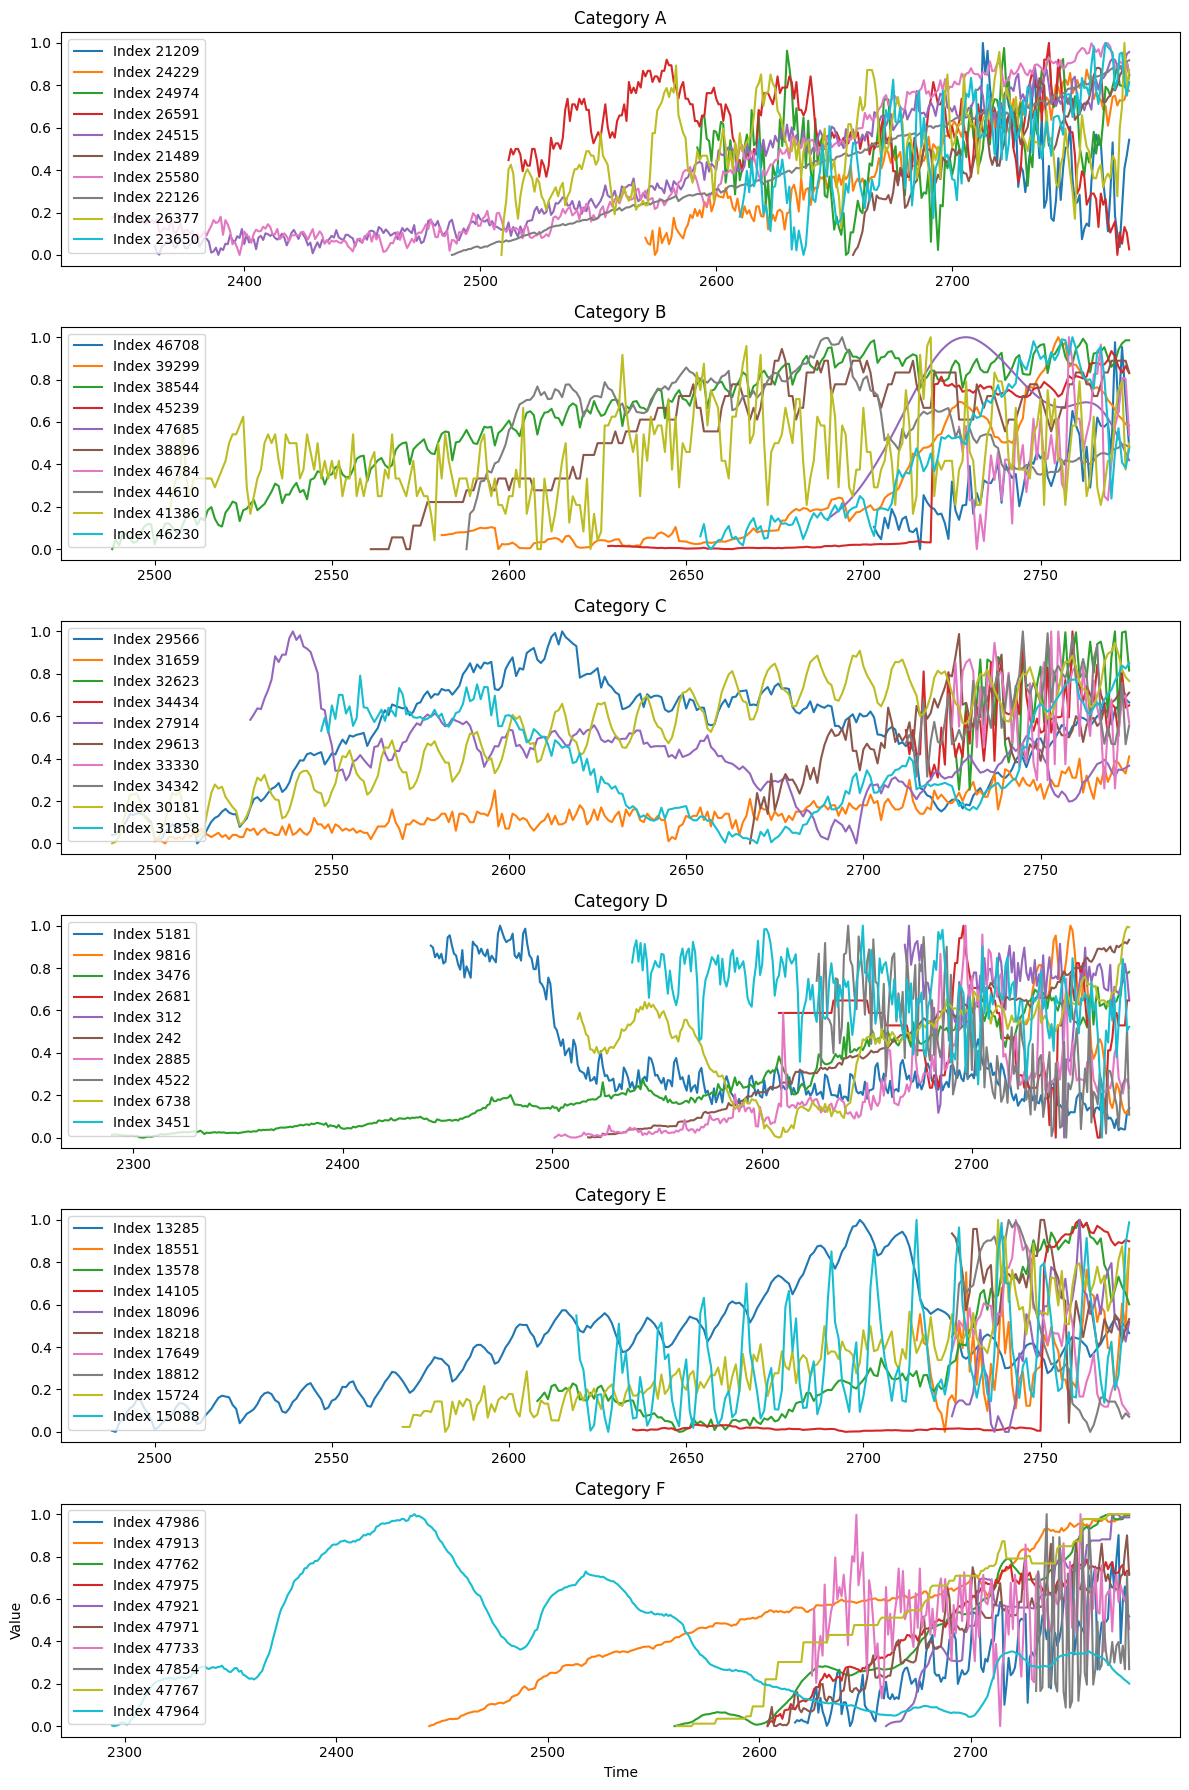

In [25]:
# Plot 10 time series for each category
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 18))
for i, category in enumerate(np.unique(categories)):
    # Get the indices of the time series for this category
    indices = np.where(categories == category)[0]
    # Randomly choose 10 indices from this category
    chosen_indices = np.random.choice(indices, 10, replace=False)

    for ts_index in chosen_indices:
        # Find the valid period for this time series
        start, end = valid_periods[ts_index]
        # Plot the time series data for its valid period
        axes[i].plot(range(start, end), training_data[ts_index, start:end], label=f'Index {ts_index}')

    axes[i].set_title(f'Category {category}')
    axes[i].legend()

plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [26]:
# Import the necessary function from statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare the data for Tukey's HSD test
data_for_tukey = np.array([(length, category) for length, category in zip(lengths, categories)])
lengths_for_tukey = data_for_tukey[:, 0].astype(float)
categories_for_tukey = data_for_tukey[:, 1]

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(lengths_for_tukey, categories_for_tukey)
print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     A      B -112.2375    0.0 -118.3821 -106.0929   True
     A      C  -70.0341    0.0  -76.2798  -63.7883   True
     A      D  -61.1894    0.0  -67.4353  -54.9436   True
     A      E -115.1343    0.0 -121.2801 -108.9885   True
     A      F    -83.35    0.0 -106.5453  -60.1548   True
     B      C   42.2034    0.0   36.9947   47.4121   True
     B      D   51.0481    0.0   45.8393   56.2569   True
     B      E   -2.8968 0.5836   -7.9852    2.1915  False
     B      F   28.8875 0.0045    5.9497   51.8252   True
     C      D    8.8447    0.0    3.5169   14.1724   True
     C      E  -45.1002    0.0  -50.3103  -39.8902   True
     C      F  -13.3159 0.5635   -36.281    9.6491  False
     D      E  -53.9449    0.0  -59.1551  -48.7347   True
     D      F  -22.1606 0.0658  -45.1257    0.8045  False
     E      F 

In [27]:
mean_lengths = {}
for category in np.unique(categories):
    mean_lengths[category] = lengths[categories == category].mean()

print('MEAN LENGHTS')
mean_lengths

MEAN LENGHTS


{'A': 278.18034217877096,
 'B': 165.9428415400018,
 'C': 208.14625137266646,
 'D': 216.9909145367412,
 'E': 163.04601366742597,
 'F': 194.8303249097473}

In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
reshaped_categories = categories.reshape(-1, 1)
onehot_categories = encoder.fit_transform(reshaped_categories)

onehot_categories

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [29]:
from sklearn.model_selection import train_test_split

# Split the indices of the time series into training and validation sets
train_indices, val_indices = train_test_split(np.arange(len(training_data_df)), test_size=0.05, random_state=42, stratify=categories)

# Use these indices to create training and validation sets
train_set = training_data_df.iloc[train_indices]
valid_periods_train = valid_periods[train_indices]
onehot_categories_train = onehot_categories[train_indices]

val_set = training_data_df.iloc[val_indices]
valid_periods_val = valid_periods[val_indices]
onehot_categories_val = onehot_categories[val_indices]

train_set.shape, valid_periods_train.shape, onehot_categories_train.shape, val_set.shape, valid_periods_val.shape, onehot_categories_val.shape

((45600, 2776), (45600, 2), (45600, 6), (2400, 2776), (2400, 2), (2400, 6))

In [30]:
def calculate_padding_length(sq, w, t, s):
    cycle = w + t
    if sq <= cycle: return cycle - sq
    else:
        m = (sq - cycle) % s
        if m == 0: return m
        else: return s - m

In [31]:
def create_sequences(df, valid_periods, categories, window, telescope, stride=1):

    input_sequences = []
    input_categories = []
    output_sequences = []


    for i in range(len(valid_periods)):

        start, end = valid_periods[i]
        category = categories[i]

        sequence = df.iloc[i, start:end].values

        padding_length = calculate_padding_length(len(sequence), window, telescope, stride)
        sequence = np.pad(sequence, (padding_length, 0), mode='constant', constant_values=0)

        for j in range(0, len(sequence) - window - telescope + 1, stride):
            input_seq = sequence[j:(j + window)]
            output_seq = sequence[(j + window):(j + window + telescope)]

            input_sequences.append(input_seq)
            input_categories.append(category)
            output_sequences.append(output_seq)

    return np.array(input_sequences), np.array(input_categories), np.array(output_sequences)

In [32]:
window = 200
telescope = 18
stride = 5

In [33]:
X_train, X_train_category, y_train = create_sequences(train_set, valid_periods_train, onehot_categories_train, window, telescope, stride)
X_val, X_val_category, y_val = create_sequences(val_set, valid_periods_val, onehot_categories_val, window, telescope, stride)
X_train.shape, X_train_category.shape, y_train.shape, X_val.shape, X_val_category.shape, y_val.shape

((455927, 200),
 (455927, 6),
 (455927, 18),
 (24958, 200),
 (24958, 6),
 (24958, 18))

In [34]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
seasonality_trend_X_Train = []
for i, data in enumerate(X_train):
    if(i%10000 == 0):
        print(i)
    # Placeholder period, to be determined based on data characteristics
    period = 15
    decomposition = seasonal_decompose(data, model='additive', period=period)
    seasonality_trend_X_Train.append(decomposition.trend + decomposition.seasonal)

In [ ]:
seasonality_trend_X_Val = []
for i, data in enumerate(X_val):
    if(i%1000 == 0):
        print(i)
    # Placeholder period, to be determined based on data characteristics
    period = 15
    decomposition = seasonal_decompose(data, model='additive', period=period)
    seasonality_trend_X_Val.append(decomposition.trend + decomposition.seasonal)
df_new_Val = pd.DataFrame(seasonality_trend_X_Val)
df_new_Val.replace(np.nan, 0, inplace=True)
x_Val_new = np.array(df_new_Val)

In [38]:
input_shape = (window, 1)
category_shape = (6, )
output_shape = (telescope, 1)
batch_size = 64
epochs = 200

In [39]:
import tensorflow.keras.layers as tfkl
import tensorflow as tf

def scaled_dot_product_attention(query, key, value):
    """ Calculate the attention weights. """
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)
    attention_weights = tf.nn.softmax(logits, axis=-1)
    output = tf.matmul(attention_weights, value)
    return output

class SelfAttention(tfkl.Layer):
    def __init__(self, d_model):
        super(SelfAttention, self).__init__()
        self.query_dense = tfkl.Dense(d_model)
        self.key_dense = tfkl.Dense(d_model)
        self.value_dense = tfkl.Dense(d_model)

    def call(self, x):
        query = self.query_dense(x)
        key = self.key_dense(x)
        value = self.value_dense(x)
        attention = scaled_dot_product_attention(query, key, value)
        return attention

In [58]:
import tensorflow.keras.layers as tfkl
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Cropping1D,MaxPooling1D,RepeatVector, Bidirectional, LSTM, GlobalAveragePooling1D, Dropout, Dense, Reshape, Concatenate
from tensorflow.keras.models import Model
def build_CONV_LSTM_model(input_shape, category_shape, output_shape):
    # Ensure the input time steps are at least as many as the output time steps
    assert input_shape[0] >= output_shape[0], "Input time steps should be >= output time steps"

    # Time Series Input
    input_layer = Input(shape=input_shape, name='input_layer')

    # Convolutional Layers
    x = Conv1D(256,11, padding='same', activation='relu', name='conv1')(input_layer)
    x = MaxPooling1D()(x)

    x = Conv1D(256,7, padding='same', activation='relu', name='conv2')(x)
    x = MaxPooling1D()(x)

    x = Conv1D(128, 5, padding='same', activation='relu', name='conv3')(x)
    x = MaxPooling1D()(x)

    x = Conv1D(128, 3, padding='same', activation='relu', name='conv4')(x)
    x = MaxPooling1D()(x)

    x = Bidirectional(LSTM(128, return_sequences=True, name='lstm'))(x)
    x = Bidirectional(LSTM(256, return_sequences=True, name='lstm'))(x)
    x = Bidirectional(LSTM(512, return_sequences=True, name='lstm'))(x)
    x = tfkl.Dropout(.2)(x)

    # Self-Attention layer
    x = SelfAttention(512)(x)
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu')(x)
    x = GlobalAveragePooling1D()(x)

    # Category Input
    category_input = Input(shape=category_shape, name='category_input')
    category_processed = Dense(128, activation='relu')(category_input)


    # Combine the processed inputs
    combined = Concatenate()([x, category_processed])

    dense1 = tfkl.Dense(512)(combined)
    # Output Convolution Layer
    #output_layer = Conv1D(output_shape[1], 3, padding='same', name='output_layer')(combined)
    dense2 = tfkl.Dense(output_shape[-1]*output_shape[-2])(dense1)

    output_layer = tfkl.Reshape((output_shape[-2],output_shape[-1]))(dense2)
    output_layer = tfkl.Conv1D(output_shape[-1], 1, padding='same')(output_layer)
    print(output_layer.shape[1] , output_shape[0])
    # Adjust output size if necessary
    if output_layer.shape[1] > output_shape[0]:
        crop_size = output_layer.shape[1] - output_shape[0]
        print(crop_size)
        output_layer = Cropping1D((0, crop_size))(output_layer)
        print(output_layer.shape)

    # Construct the model
    model = Model(inputs=[input_layer, category_input], outputs=output_layer, name='CONV_LSTM_model')

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [59]:
model = build_CONV_LSTM_model(input_shape, category_shape, output_shape)

18 18


Model: "CONV_LSTM_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 200, 1)]             0         []                            
                                                                                                  
 conv1 (Conv1D)              (None, 200, 256)             3072      ['input_layer[0][0]']         
                                                                                                  
 max_pooling1d_35 (MaxPooli  (None, 100, 256)             0         ['conv1[0][0]']               
 ng1D)                                                                                            
                                                                                                  
 conv2 (Conv1D)              (None, 100, 256)             459008    ['max_pooling1d_

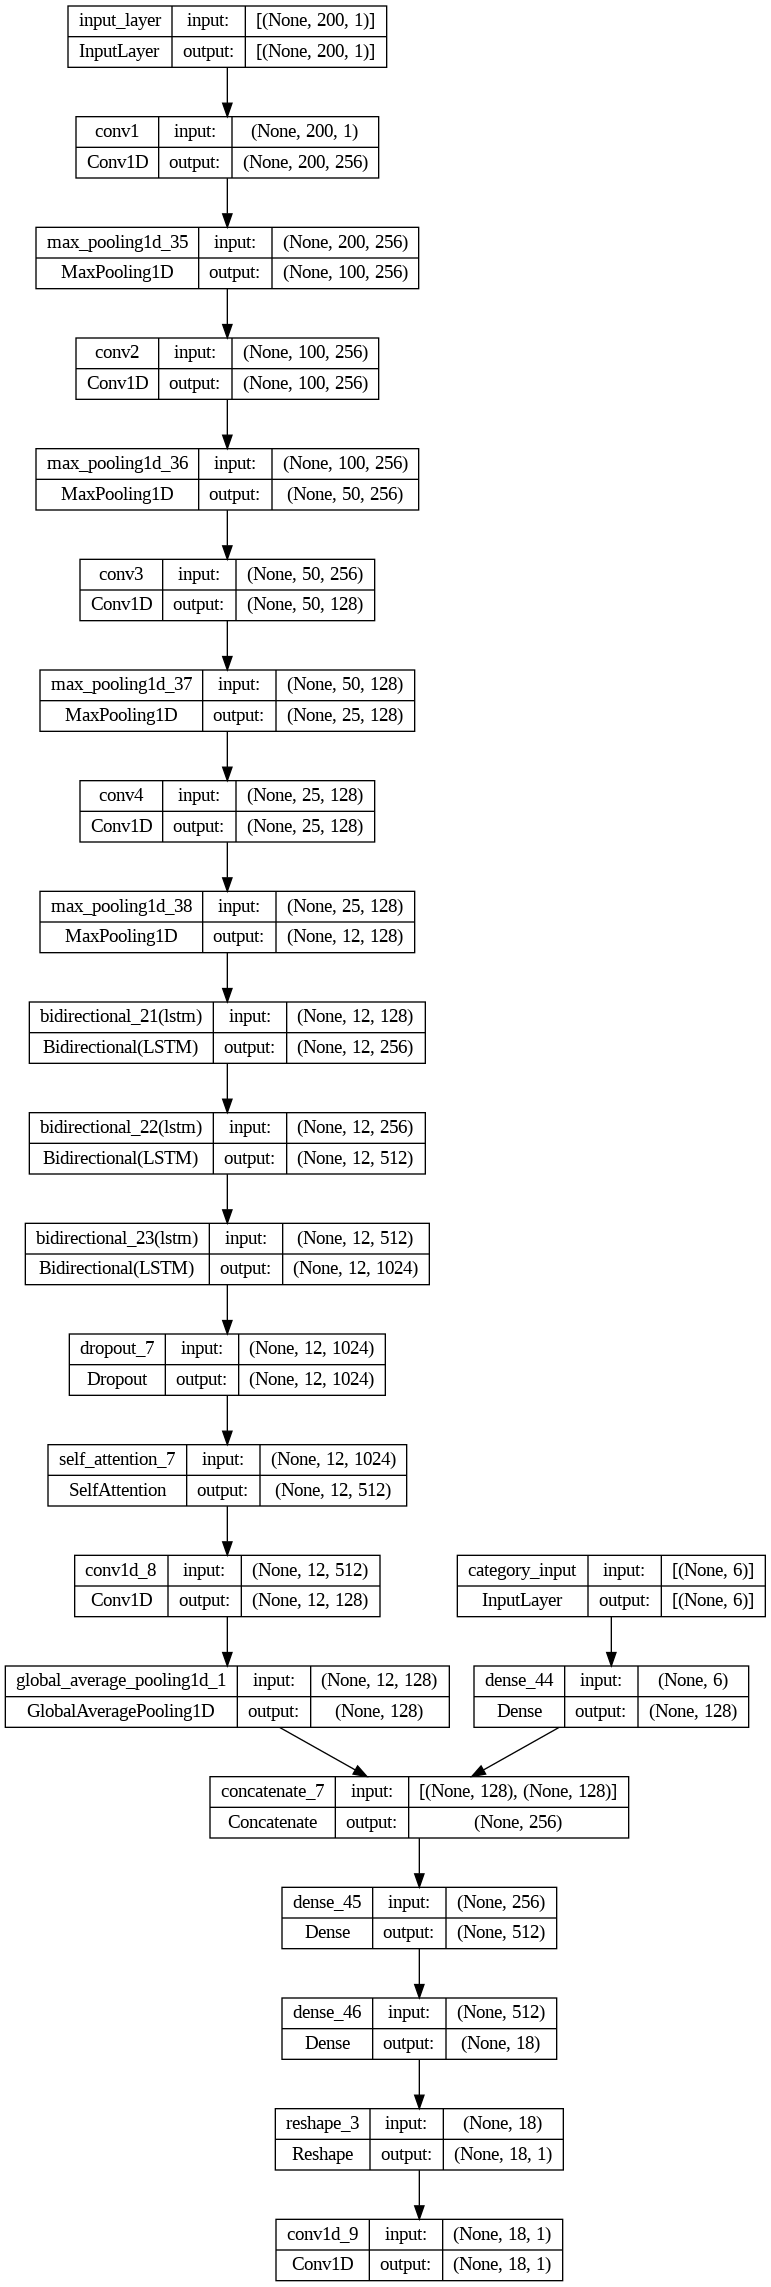

In [60]:
model.summary()

from tensorflow import keras as tfk
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [61]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    patience=5,
    factor=0.1,
    min_lr=1e-5
)

history = model.fit(
    x = [X_train, X_train_category],
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = ([X_val, X_val_category], y_val),
    callbacks = [
        early_stopping,
        reduce_lr
    ]
).history

Epoch 1/200
7124/7124 [==============================] - 238s 31ms/step - loss: 0.0127 - val_loss: 0.0103 - lr: 0.0010
Epoch 2/200
7124/7124 [==============================] - 214s 30ms/step - loss: 0.0104 - val_loss: 0.0096 - lr: 0.0010
Epoch 3/200
7124/7124 [==============================] - 214s 30ms/step - loss: 0.0096 - val_loss: 0.0095 - lr: 0.0010
Epoch 4/200
7124/7124 [==============================] - 214s 30ms/step - loss: 0.0092 - val_loss: 0.0089 - lr: 0.0010
Epoch 5/200
7124/7124 [==============================] - 213s 30ms/step - loss: 0.0088 - val_loss: 0.0087 - lr: 0.0010
Epoch 6/200
7124/7124 [==============================] - 213s 30ms/step - loss: 0.0085 - val_loss: 0.0086 - lr: 0.0010
Epoch 7/200
7124/7124 [==============================] - 214s 30ms/step - loss: 0.0082 - val_loss: 0.0084 - lr: 0.0010
Epoch 8/200
7124/7124 [==============================] - 214s 30ms/step - loss: 0.0078 - val_loss: 0.0085 - lr: 0.0010
Epoch 9/200
7124/7124 [=========================

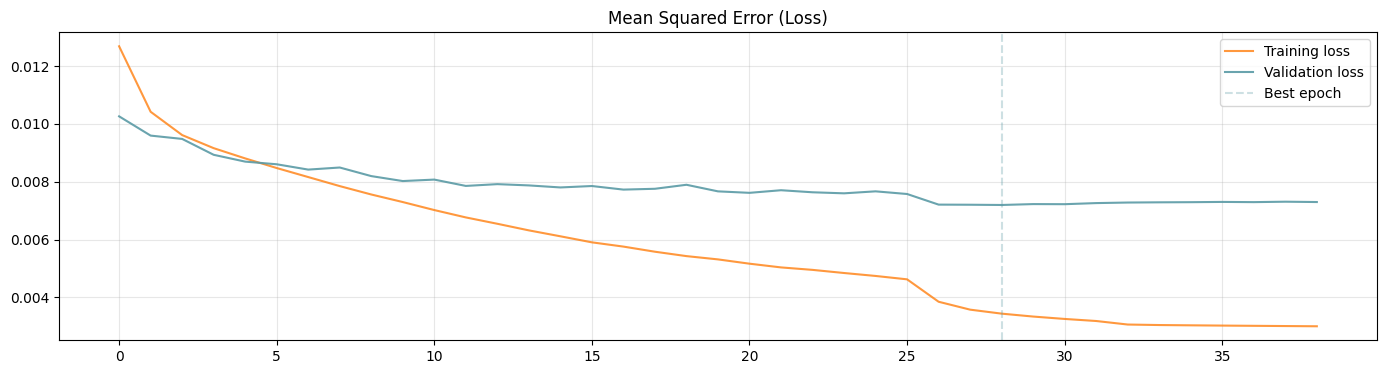

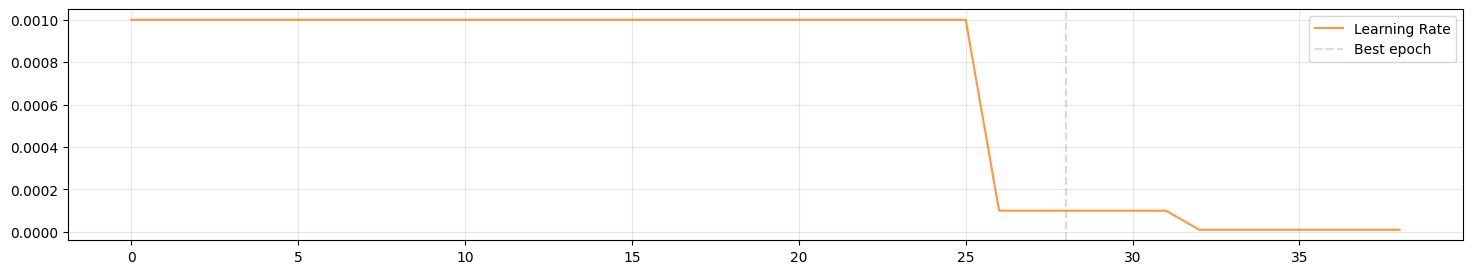

In [62]:
import matplotlib.pyplot as plt
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [63]:
preds = model.predict([X_val, X_val_category])

780/780 [==============================] - 11s 8ms/step


In [ ]:
preds.shape

(50662, 9, 1)

In [64]:
import tensorflow.keras as tfk
# Predict the test set using the model
predictions = preds

# Print the shape of the predictions
print(f"Predictions shape: {predictions.shape}")

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = tfk.metrics.mean_squared_error(y_val.flatten(), predictions.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = tfk.metrics.mean_absolute_error(y_val.flatten(), predictions.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")

Predictions shape: (24958, 18, 1)
Mean Squared Error: 0.007196816150099039
Mean Absolute Error: 0.053011488169431686


In [65]:

def plot_with_training(y_train, y_true, y_pred, num_samples=3):
    """Plot the training, true, and predicted values for a random sample of sequences."""
    sample_indices = np.random.choice(np.arange(len(y_true)), num_samples, replace=False)

    for i, index in enumerate(sample_indices, 1):
        plt.figure(figsize=(12, 4))

        # Plot the training part (first 200 points)
        plt.plot(y_train[index].flatten(), label='Training Values', color='blue')

        # Plot the true values (next 18 points)
        true_start_index = len(y_train[index])
        plt.plot(range(true_start_index, true_start_index + len(y_true[index])),
                 y_true[index].flatten(), label='True Values', color='green')

        # Plot the predicted values (next 18 points)
        plt.plot(range(true_start_index, true_start_index + len(y_pred[index])),
                 y_pred[index].flatten(), label='Predicted Values', linestyle='--', color='red')

        plt.title(f'Sequence {i} - Training, True vs Predicted')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

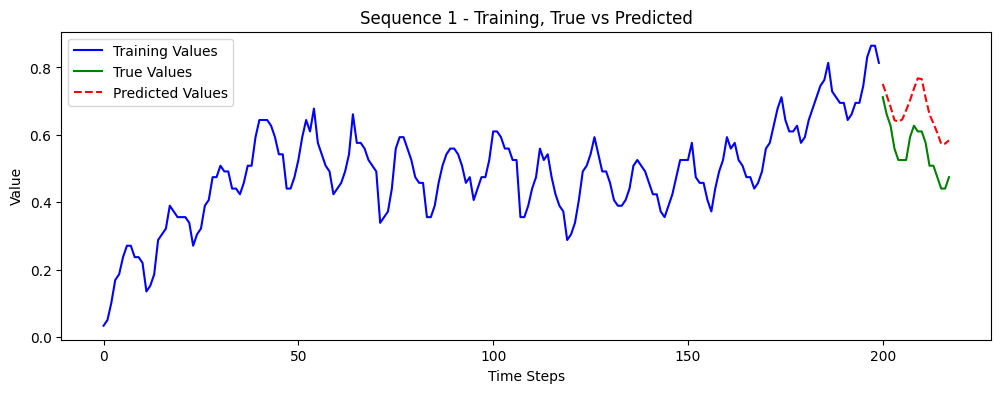

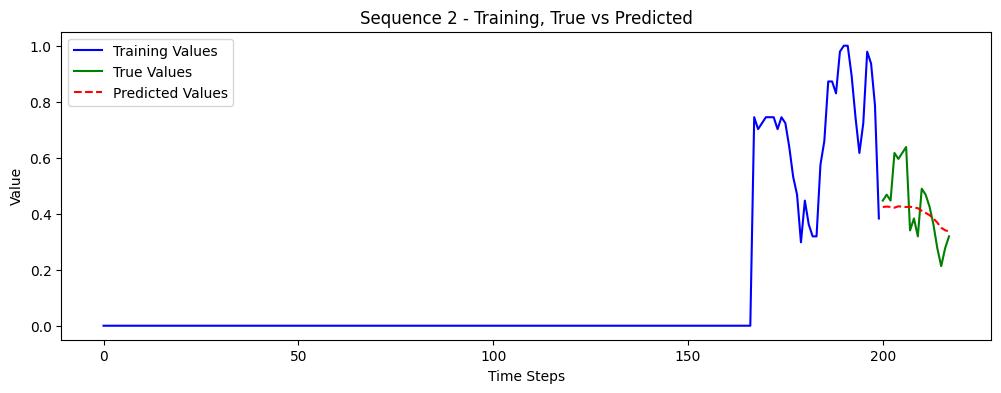

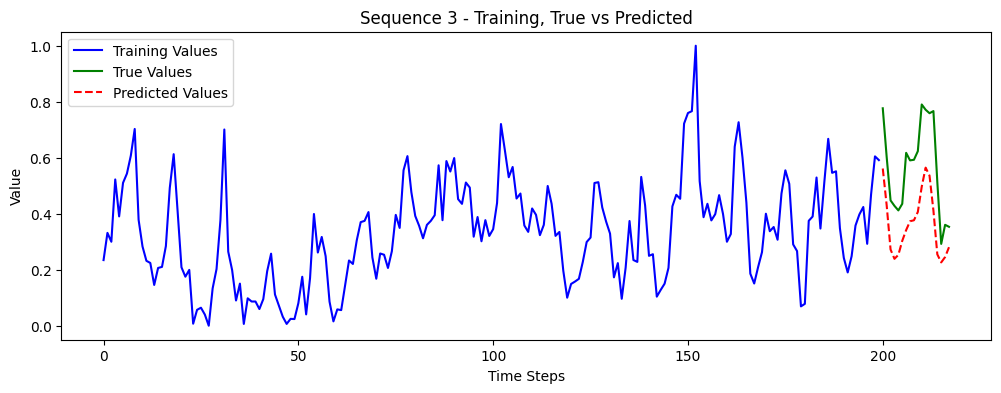

In [66]:
plot_with_training(X_val, y_val, preds)


In [67]:
model.save("lstm+self_attention+conv")